# Model for classification of Type of glass

We have obtained the dataset for type of glass and attributes from UCI datasets, here we examine the attributes and design a classification model based on the same. There can be multiple ways of performing the same task, here we use Random Forest for our project.

### Importing Liberaries and Data

In [1]:
# Begin with importing the required liberaries

import numpy as np                              # for arrays
import pandas as pd                             # to read files and other tools
import matplotlib.pyplot as plt                 # plots
import seaborn as sns                           # plots 
%matplotlib inline

In [3]:
# read the file using pandas command and assign a variable

df = pd.read_csv('data.csv')
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In the data we observe that column 'Id' is nothing but another index starting from 1.
So we can drop this column to avoid unncessary crowd.

In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Now since we observe the 'Id' column has been dropped, we move on to study relation between various attributes

### Exploratory data analysis

Here we use scatterplot to study relation between two attributes, we can use other methods too, just a matter of choice.

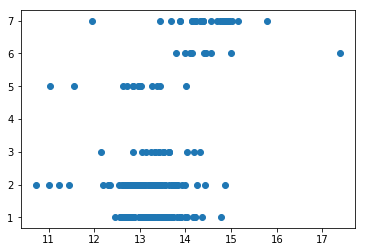

In [6]:
plt.scatter(df['Na'],df['Type of glass'])

By simply plotting a scatterplot between 'Na' and 'Type of glass' we see that range of Sodium(Na) content in the glass is quiet limited between 12 and 15 units, except the few outliers. This doesn't give us a proper perspective of dependence of type of glass on Sodium content.
So we drop the 'Na' column since it may not be of much importance

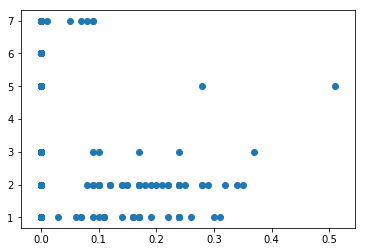

In [7]:
plt.scatter(df['Fe'],df['Type of glass'])

In a similar fashion, plot a scatterplot between 'Fe' and 'Type of glass', we see some variation in the scatter, perhaps the Iron content is quiet an important attribute in determining the glass type.

Now we use a function 'pairplot' to determine the relation between various features.

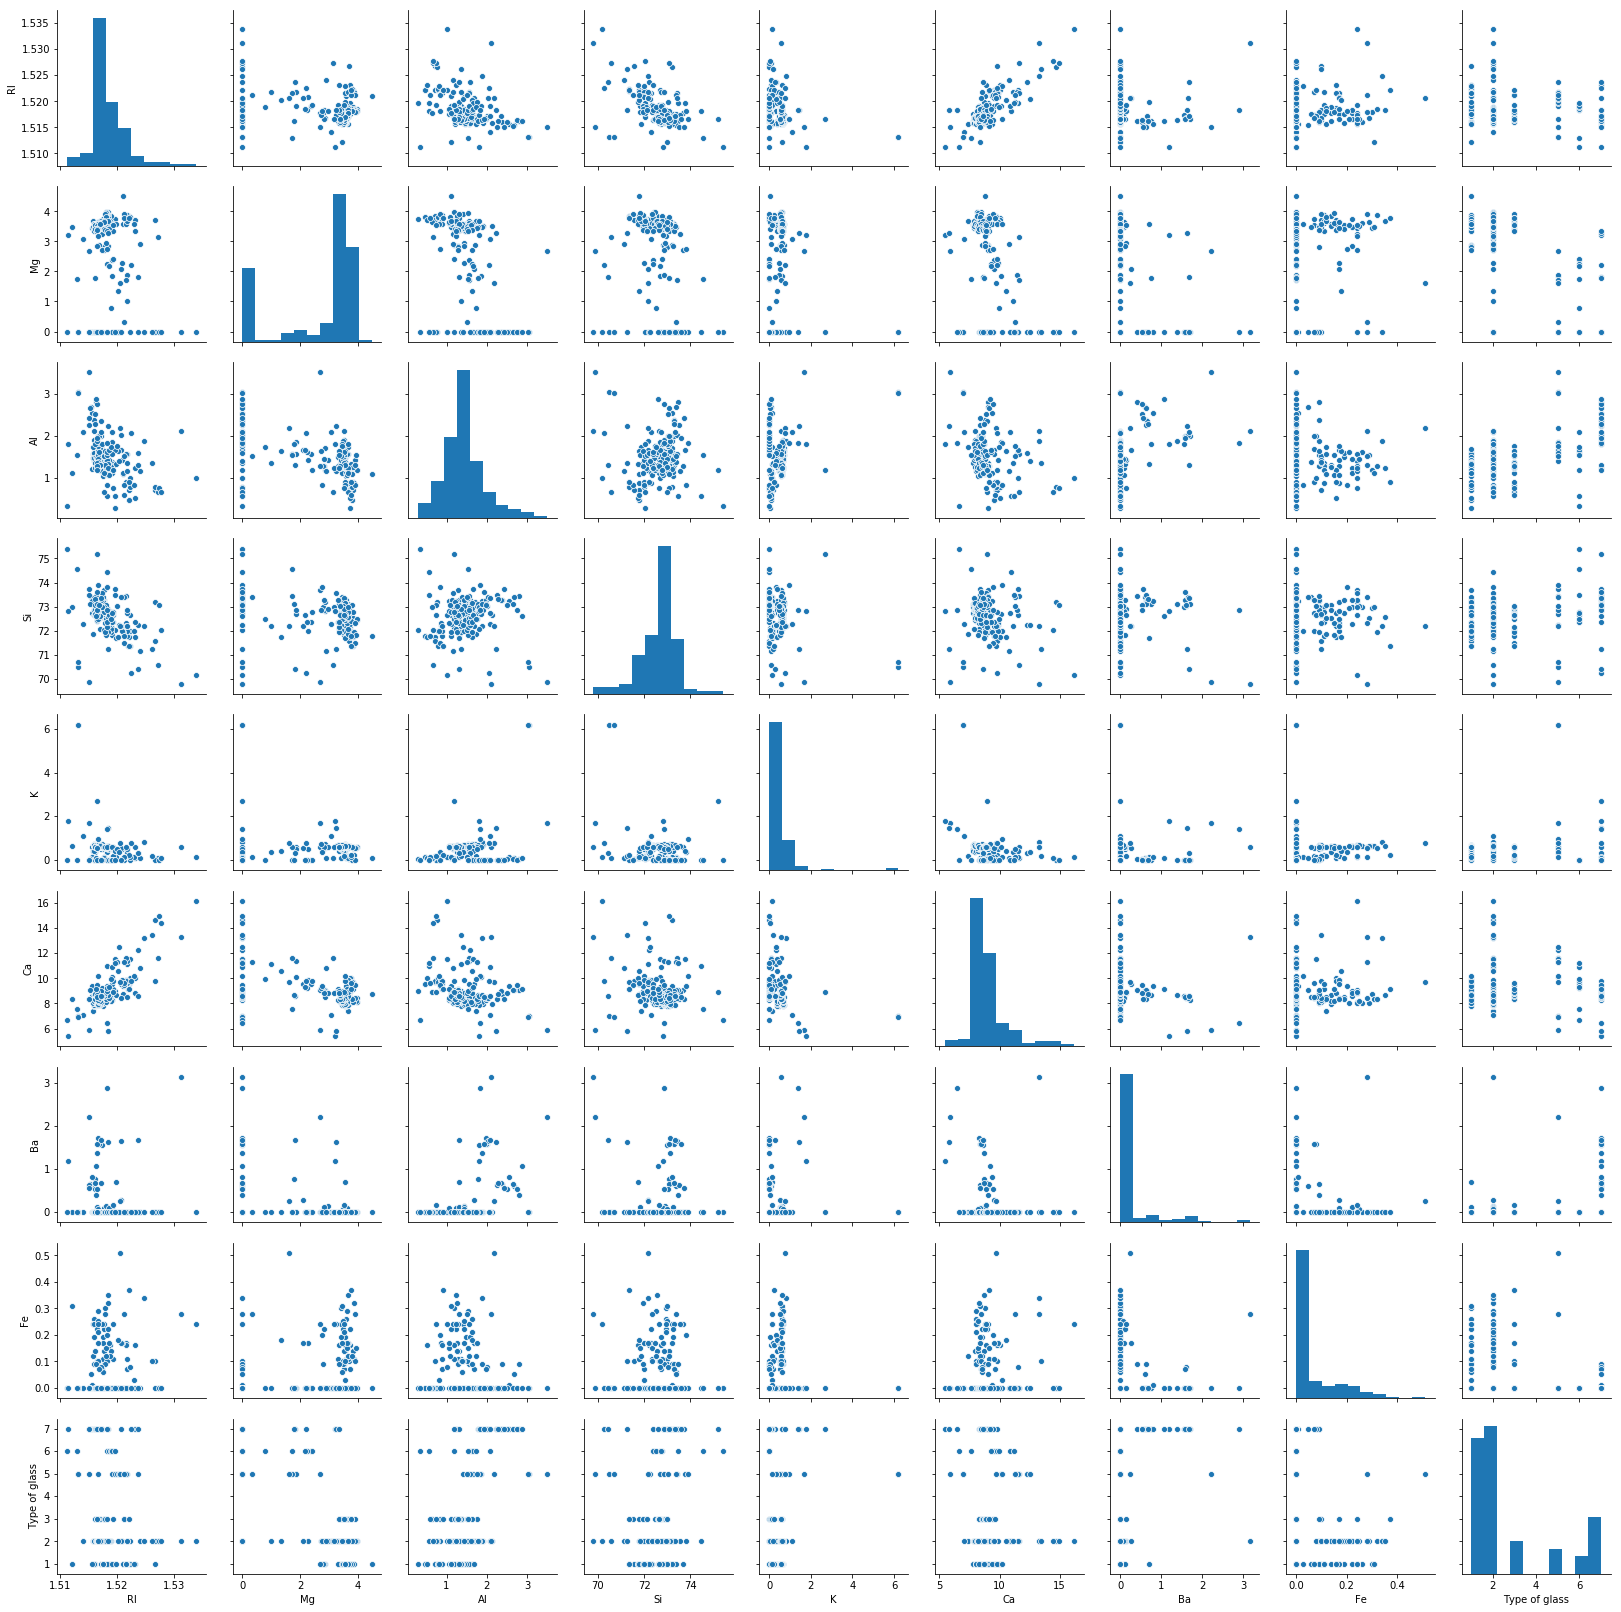

In [8]:
sns.pairplot(df.drop('Na',axis=1))

Pay attention to only the last column/row to study the characteristics of different features in accordance with the final result.

We see that column 'Ba' is not making any change either, except for type-7 of glass. Likewise, we will drop this column too.

### Model selection and train-test split

Before implementing our model, it is important to split our data into train and test sets.
we would use 70% of data for training and rest for the testing.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [11]:
X = df[['RI', 'Mg', 'Si', 'Al', 'K', 'Fe']]     # dropped non-important columns as explained earlier
y = df['Type of glass']                         # target class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [12]:
from sklearn.ensemble import RandomForestClassifier     # using Random Forest for our model

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report       # import classification report for checking accuracy of our model

In [15]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.83      0.86      0.85        29
          2       0.62      0.81      0.70        16
          3       1.00      0.40      0.57         5
          5       1.00      0.50      0.67         4
          6       1.00      1.00      1.00         2
          7       0.88      0.78      0.82         9

avg / total       0.81      0.78      0.78        65



Here we achieve accuracy as good as 80% by using limited number of features.

We can experiment more by selecting features as per requirement.